 Phát hiện bàn tay (hand detection) sử dụng đặc trưng Haar-like và Adaboost 
- Chuẩn bị dự liệu
- Huấn luyện mô hình
- Sử dụng mô hình đã huấn luyện để phát hiện bàn tay
- Đánh giá hiệu năng của mô hình đã huấn luyện

In [1]:
import os 
import cv2
import numpy as np


 Chuẩn bị dữ liệu thô

Bộ dữ liệu L3i-MICA được thu thập từ 12 người khác nhau, được chia thành 2 tập Train/Test lần lượt lưu trong các thư mục Train/Test. Bộ dữ liệu gồm nhiều video, mỗi video có độ dài khoảng 3 giây với frame rate là 30. Từ mỗi video này ta cần trích ra một vài frame để làm dữ liệu huấn luyện. Ngoài ra, đi kèm với bộ dữ liệu này là một tệp 'info_train_whole_hand.txt' và 'info_test_whole_hand.txt' để lưu trữ nhãn dữ liệu. Hãy quan sát một vài dòng trong các tệp này:

In [2]:
!type info_train_whole_hand.txt

Train\Person1\01Person1Time2.avi	1	77	92	56	42
Train\Person1\01Person1Time4.avi	1	50	98	62	39
Train\Person1\02Person1Time2.avi	2	106	92	66	50
Train\Person1\02Person1Time4.avi	2	82	91	65	44
Train\Person1\03Person1Time2.avi	3	117	89	42	73
Train\Person1\03Person1Time4.avi	3	74	114	39	68
Train\Person1\04Person1Time2.avi	4	113	105	44	73
Train\Person1\04Person1Time4.avi	4	57	123	40	72
Train\Person1\05Person1Time2.avi	5	93	99	46	49
Train\Person1\05Person1Time4.avi	5	64	83	40	47
Train\Person1\06Person1Time2.avi	6	91	74	41	72
Train\Person1\06Person1Time4.avi	6	58	82	38	68
Train\Person1\07Person1Time2.avi	7	88	68	43	74
Train\Person1\07Person1Time4.avi	7	62	80	43	72
Train\Person1\08Person1Time2.avi	8	93	78	38	78
Train\Person1\08Person1Time4.avi	8	62	83	40	74
Train\Person1\09Person1Time2.avi	9	89	67	49	78
Train\Person1\09Person1Time4.avi	9	57	76	47	76
Train\Person1\10Person1Time2.avi	10	94	69	53	77
Train\Person1\10Person1Time4.avi	10	65	78	54	76
Train\Person1\11Person1Time2.avi	11	80	70	74	81
Trai

In [2]:
def extract_image_from_video(info_file, image_save_path, ann_path, gesture_list=None, frames_per_capture=10):
    
    # Tạo thư mục chứa ảnh nếu không tồn tại
    if not os.path.isdir(image_save_path):
        os.makedirs(image_save_path)
        
    # Mở tệp info để đọc
    with open(info_file, 'r') as f:
        # Mở tệp annotation để ghi
        with open(os.path.join(ann_path), 'w',encoding='utf-8') as g:
            # Biến đếm số lượng video, có thể sử dụng để đặt tên ảnh
            number_of_video = 0
            
            # Xét từng dòng trong file info
            for line in f:
                # Một vài bước xử lý dữ liệu 
                line = line.replace('\r\n', '')
                if os.name == 'posix':# check có phải hệ điều hành mac,linux ko để đổi đường dẫn
                    line = line.replace('\\', '/')
                
                # TODO: Lấy thông tin từng trường trong dòng line, lưu ra các biến tương ứng
                video_path, gesture_type, x, y, w, h = None, None, None, None, None, None 
             
                line = line.split('\t')
                video_path = line[0]
                gesture_type, x, y, w, h = [int(x) for x in line[1:]]
                # END YOUR CODE #
                # print(video_path, gesture_type, x, y, w, h)
                
                # Kiểm tra gesture_type
                if (gesture_list is None) or (gesture_type in gesture_list):
                    # Tăng số lượng video 
                    number_of_video += 1
                    
                    # Biến đếm số lượng frame
                    count = -1
                    
                   
                  
                    cap = cv2.VideoCapture(video_path)
                    while cap.isOpened():
                        ret, frame = cap.read()
                        if not ret:
                            break
                        count += 1
                        if count % frames_per_capture == 0:
                            file_name = os.path.join(image_save_path, (str(number_of_video) + '_' + str(count) + '.jpg'))
                            cv2.imwrite(file_name, frame)
                            g.write("%s %d %d %d %d %d\n" % (os.path.abspath(file_name), 1, x, y, w, h))
                

In [3]:
extract_image_from_video(info_file='info_train_whole_hand.txt', 
                         ann_path='train_ann.txt', 
                         image_save_path='Image/Train', 
                         gesture_list=[1, 2, 3],
                         frames_per_capture=20)

In [4]:
extract_image_from_video(info_file='info_test_whole_hand.txt', 
                         ann_path='test_ann.txt', 
                         image_save_path='Image/Test', 
                         gesture_list=[1, 2, 3],
                         frames_per_capture=20)

Kết quả ta thu được thư mục chứa các ảnh và file annotaion:

In [5]:
!type train_ann.txt

C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_0.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_20.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_40.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_60.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_80.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\1_100.jpg 1 77 92 56 42
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_0.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_20.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_40.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_60.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_80.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\2_100.jpg 1 50 98 62 39
C:\Users\ADMIN\B9\thuchanh09\Image\Train\3_0.jpg 1 106 92 66 50
C:\Users\ADMIN\B9\thuchanh09\Image\Train\3_20.jpg 1 106 92 66 50
C:\Users\ADMIN\B9\thuchanh09\Image\Train\3_40.jpg 1 106 92 66 50
C:\Users\ADMIN\B9\thuchanh09\Image\Tra

Xây dựng dữ liệu huấn luyện theo chuẩn của OpenCV
Để huấn luyện mô hình HaarCascade ta cần có tập dữ liệu Positive và Negative, ta sẽ lần lượt xây dựng các tập này theo đúng mẫu của OpenCV

* Chuẩn bị tập Positive: Ta sẽ sử dụng annotation file đã xây dựng ở bên trên và tool opencv_creatsamples của OpenCV:

In [7]:
!opencv_createsamples -vec training.vec -info train_ann.txt -w 32 -h 24 -num 3000
# tạo ra mẫu ảnh từ các tệp thông tin train, w: chiều rộng mẫu ảnh , h: chiều cao , num: số lượng mẫu ảnh 

Info file name: train_ann.txt
Img file name: (NULL)
Vec file name: training.vec
BG  file name: (NULL)
Num: 3000
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 32
Height: 24
Max Scale: -1
RNG Seed: 12345
Create training samples from images collection...
Done. Created 434 samples


train_ann.txt(435) : parse error


* Chuẩn bị tập Negative: Tập ảnh negative được đặt trong thư mục Negative. Ta cần xây dựng file negative.txt gồm nhiều dòng, mỗi dòng chứa đường dẫn đến ảnh negative:

In [8]:
with open('negative.txt', 'w') as f:
    for file_name in os.listdir('Negative'):
        f.write(os.path.join('Negative', file_name))
        f.write('\n')

In [9]:
!type negative.txt

Negative\10000.bmp
Negative\10001.bmp
Negative\10002.bmp
Negative\10003.bmp
Negative\10004.bmp
Negative\10005.bmp
Negative\10006.bmp
Negative\10007.bmp
Negative\10008.bmp
Negative\10009.bmp
Negative\10010.bmp
Negative\8680.bmp
Negative\8681.bmp
Negative\8682.bmp
Negative\8683.bmp
Negative\8684.bmp
Negative\8685.bmp
Negative\8686.bmp
Negative\8687.bmp
Negative\8688.bmp
Negative\8689.bmp
Negative\8690.bmp
Negative\8691.bmp
Negative\8692.bmp
Negative\8693.bmp
Negative\8694.bmp
Negative\8695.bmp
Negative\8696.bmp
Negative\8697.bmp
Negative\8698.bmp
Negative\8699.bmp
Negative\8700.bmp
Negative\8701.bmp
Negative\8702.bmp
Negative\8703.bmp
Negative\8704.bmp
Negative\8705.bmp
Negative\8706.bmp
Negative\8707.bmp
Negative\8708.bmp
Negative\8709.bmp
Negative\8710.bmp
Negative\8711.bmp
Negative\8712.bmp
Negative\8713.bmp
Negative\8714.bmp
Negative\8715.bmp
Negative\8716.bmp
Negative\8717.bmp
Negative\8718.bmp
Negative\8719.bmp
Negative\8720.bmp
Negative\8721.bmp
Negative\8722.bmp
Negative\8723.bmp

 Huấn luyện mô hình

In [10]:
!opencv_traincascade -vec training.vec -bg negative.txt -w 32 -h 24 -numStages 10 -data haar/ -maxFalseAlarmRate 0.3 -numPos 400 -numNeg 400

PARAMETERS:
cascadeDirName: haar/
vecFileName: training.vec
bgFileName: negative.txt
numPos: 400
numNeg: 400
numStages: 10
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 32
sampleHeight: 24
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.3
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: BASIC
Number of unique features given windowSize [32,24] : 287772

===== TRAINING 0-stage =====
<BEGIN
POS current samples: 1
POS current samples: 2
POS current samples: 3
POS current samples: 4
POS current samples: 5
POS current samples: 6
POS current samples: 7
POS current samples: 8
POS current samples: 9
POS current samples: 10
POS current samples: 11
POS current samples: 12
POS current samples: 13
POS current samples: 14
POS current samples: 15
POS current samples: 16
POS current samples: 17
POS current samples: 18
POS current samples: 19
POS current samples: 20
POS current samples: 21
POS curre

NEG current samples: 119
NEG current samples: 120
NEG current samples: 121
NEG current samples: 122
NEG current samples: 123
NEG current samples: 124
NEG current samples: 125
NEG current samples: 126
NEG current samples: 127
NEG current samples: 128
NEG current samples: 129
NEG current samples: 130
NEG current samples: 131
NEG current samples: 132
NEG current samples: 133
NEG current samples: 134
NEG current samples: 135
NEG current samples: 136
NEG current samples: 137
NEG current samples: 138
NEG current samples: 139
NEG current samples: 140
NEG current samples: 141
NEG current samples: 142
NEG current samples: 143
NEG current samples: 144
NEG current samples: 145
NEG current samples: 146
NEG current samples: 147
NEG current samples: 148
NEG current samples: 149
NEG current samples: 150
NEG current samples: 151
NEG current samples: 152
NEG current samples: 153
NEG current samples: 154
NEG current samples: 155
NEG current samples: 156
NEG current samples: 157
NEG current samples: 158


Sử dụng mô hình đã huấn luyện để detect trên ảnh thực tế
ta sẽ sử dụng mô hình đã huấn luyện để thử tìm kiếm bàn tay trên ảnh trong tập dữ liệu test. 

[[42 70 73 56]]


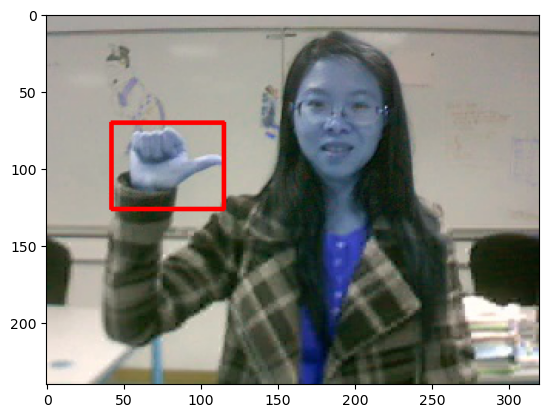

In [12]:
import matplotlib.pyplot as plt

our_cascade = cv2.CascadeClassifier('./haar/cascade.xml')
img = cv2.imread('./Image/Test/13_0.jpg')

hands = our_cascade.detectMultiScale(img, 1.3, 10)
print(hands)
for (x, y, w, h) in hands:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(img)
plt.show()


 Đánh giá hiệu năng mô hình

ta sẽ lập trình các hàm tính các giá trị Precision và Recall để đánh giá độ chính xác của mô hình detection. 

Như chúng ta đã biết, một detected box được coi là dự đoán đúng nếu độ đo IoU của nó với một ground truth box nào đó lớn hơn một ngưỡng cho trước (thương là 0.5). Hãy lập trình hàm IoU(box1, box2) nhận vào 2 hình chữ nhật box1, box2 được đặc trưng bởi 4 tham số x, y, w, h như ta quy định ở các bài tập trên, kết quả trả về độ đo IoU giữa hai hình chữ nhật đầu vào:

In [9]:
def IoU(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    iou = 0.0

    u1 = x1 + w1 - 1
    v1 = y1 + h1 - 1
    u2 = x2 + w2 - 1
    v2 = y2 + h2 - 1
    
    xA = max(x1, x2)
    yA = max(y1, y2)
    xB = min(u1, u2)
    yB = min(v1, v2)
    #print(x1, y1, u1, v1)
    #print(x2, y2, u2, v2)
    #print(xA, yA, xB, yB)
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    #print(interArea)

    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = w1 * h1
    boxBArea = w2 * h2

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

Thực hiện detect trên ảnh test: Ta sẽ thực hiện load ảnh đã chuẩn bị trong file test_ann.txt. Để đánh giá hiệu năng của mô hình ta sẽ sử dụng các độ đo: Precision, Recall và F1-score, nhắc lại các công thức tính các độ đo:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 * Precision * Recall / (Precision + Recall)

Trong đó:

TP (True Positive): Một detected box được tính là TP nếu IoU giữa nó và 1 truth box nào đó lớn hơn một ngưỡng định nghĩa trước.

FP (False Positive): Một detected box được tính là FP nếu không tồn tại 1 truth box nào mà IoU giữa 2 box lớn hơn một ngưỡng định nghĩa trước.

FN (False Negative): Một truth box mà không tồn tài một detected box nào sao cho IoU giữa 2 box lớn hơn một ngưỡng định nghĩa trước được tính là một FN.

In [30]:
TP = 0
FP = 0
FN = 0

our_cascade = cv2.CascadeClassifier('./haar/cascade.xml')

threshold = 0.3
with open('test_ann.txt', 'r') as f:
    for line in f:
        line = line.split(' ')
        image_path = line[0]
        truth_box = [int(line[i]) for i in range(2, 6)]
        
        img = cv2.imread(image_path)
        
        hands = our_cascade.detectMultiScale(img, 1.3, 0)
        
        if len(hands) == 0:
            FN += 1
            continue
        
        true_detect = 0
        for detection in hands:
            t = IoU(detection, truth_box)
            if t >= threshold:
                true_detect += 1
        TP += true_detect
        FP += len(hands) - true_detect

precision = 1.0 * TP / (TP + FP)
recall = 1.0 * TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
print(precision)
print(recall)
print(f1)

0.260039052551
1.0
0.412747608139
